In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
# 한글 폰트 설정을 위한 코드 (이미 설정하셨다면 생략)
plt.rc('font', family='Malgun Gothic') # Windows
# plt.rc('font', family='AppleGothic') # Mac
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨짐 방지

In [130]:
df = pd.read_csv('C:/Users/sopi0/codes/korea-tour-recommender/data/2024_7차_전처리.csv')
df.head()

,아이디,성별,연령별,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1,문3-2. 고려한 관광인프라_1,여행동반자_그룹,방문 지역 수,여행 패턴,"문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)",문9-3. 총 체재기간_61일 이상 결측,문3-1. 고려한 관광활동_1순위
0,57,2,5,4,콘텐츠 및 문화,안전 및 퀄리티,가족형,1,서울 심층형,451.666667,6.0,도시 소비형
1,58,2,4,4,콘텐츠 및 문화,여행 편의성,가족형,1,서울 단기형,272.935000,5.0,경험형
2,59,2,3,3,콘텐츠 및 문화,여행 편의성,단체형,1,서울 심층형,177.650000,6.0,특수 목적
3,60,1,2,1,콘텐츠 및 문화,여행 편의성,혼자형,1,서울 심층형,153.780000,6.0,경험형
4,61,2,2,4,경험형,가성비,가족형,2,서울 단기형,329.460000,5.0,도시 소비형


## '성별' 제거

In [131]:
df.drop(columns=['성별'], inplace=True)

In [132]:
raw = pd.read_csv('C:/Users/sopi0/codes/korea-tour-recommender/data/2024_만족도조사.csv', encoding='cp949')

## '문1-1. 한국여행 관심 계기_1'에서 '기타' 처리하기

In [133]:
cols = ['아이디', '문1-1. 한국여행 관심 계기_1순위', '문1-1. 한국여행 관심 계기_2순위']

In [134]:
df1 = pd.merge(left=df, right=raw[cols], on='아이디', how='inner')
df1.drop(columns='문1-1. 한국여행 관심 계기_1', inplace=True)
df1.columns

Index(['아이디', '연령별', '한국 방문횟수(카테고리)', '문3-2. 고려한 관광인프라_1', '여행동반자_그룹',
       '방문 지역 수', '여행 패턴', '문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)',
       '문9-3. 총 체재기간_61일 이상 결측', '문3-1. 고려한 관광활동_1순위', '문1-1. 한국여행 관심 계기_1순위',
       '문1-1. 한국여행 관심 계기_2순위'],
      dtype='object')

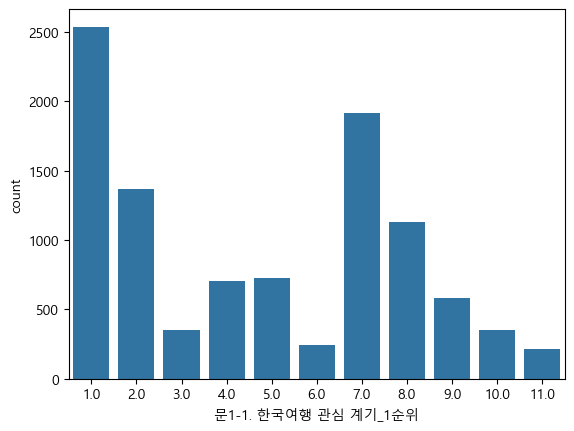

In [135]:
sns.countplot(data=df1, x='문1-1. 한국여행 관심 계기_1순위')
plt.show()

In [136]:
df1[df1['문1-1. 한국여행 관심 계기_1순위']==11]

,아이디,연령별,한국 방문횟수(카테고리),문3-2. 고려한 관광인프라_1,여행동반자_그룹,방문 지역 수,여행 패턴,"문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)",문9-3. 총 체재기간_61일 이상 결측,문3-1. 고려한 관광활동_1순위,문1-1. 한국여행 관심 계기_1순위,문1-1. 한국여행 관심 계기_2순위
11,77,3,3,여행 편의성,가족형,1,서울 단기형,271.320000,5.0,도시 소비형,11.0,NaN
205,477,2,4,여행 편의성,친구형,1,서울 단기형,426.000000,3.0,특수 목적,11.0,NaN
212,487,2,4,가성비,친구형,1,서울 단기형,284.000000,4.0,도시 소비형,11.0,NaN
231,518,5,1,여행 편의성,가족형,3,수도권/지방형(탐험가형),354.166667,12.0,특수 목적,11.0,NaN
256,580,3,2,여행 편의성,직장형,2,서울 단기형,268.090000,5.0,특수 목적,11.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9772,18609,6,4,안전 및 퀄리티,가족형,2,서울 단기형,239.866667,5.0,경험형,11.0,5.0
9807,18683,2,4,가성비,친구형,1,서울 단기형,290.333333,3.0,도시 소비형,11.0,7.0
9812,18694,6,4,가성비,친구형,1,수도권/지방형(탐험가형),1219.400000,2.0,경험형,11.0,NaN
9894,18860,6,4,가성비,친구형,1,수도권/지방형(탐험가형),958.100000,2.0,경험형,11.0,2.0


In [137]:
df1.shape

(10131, 12)

In [138]:
mask = (
    (df1['문1-1. 한국여행 관심 계기_1순위'] == 11) &
    (df1['문1-1. 한국여행 관심 계기_2순위'].isna())
)

df2 = df1.loc[~mask].reset_index(drop=True)

In [139]:
df2.shape

(10003, 12)

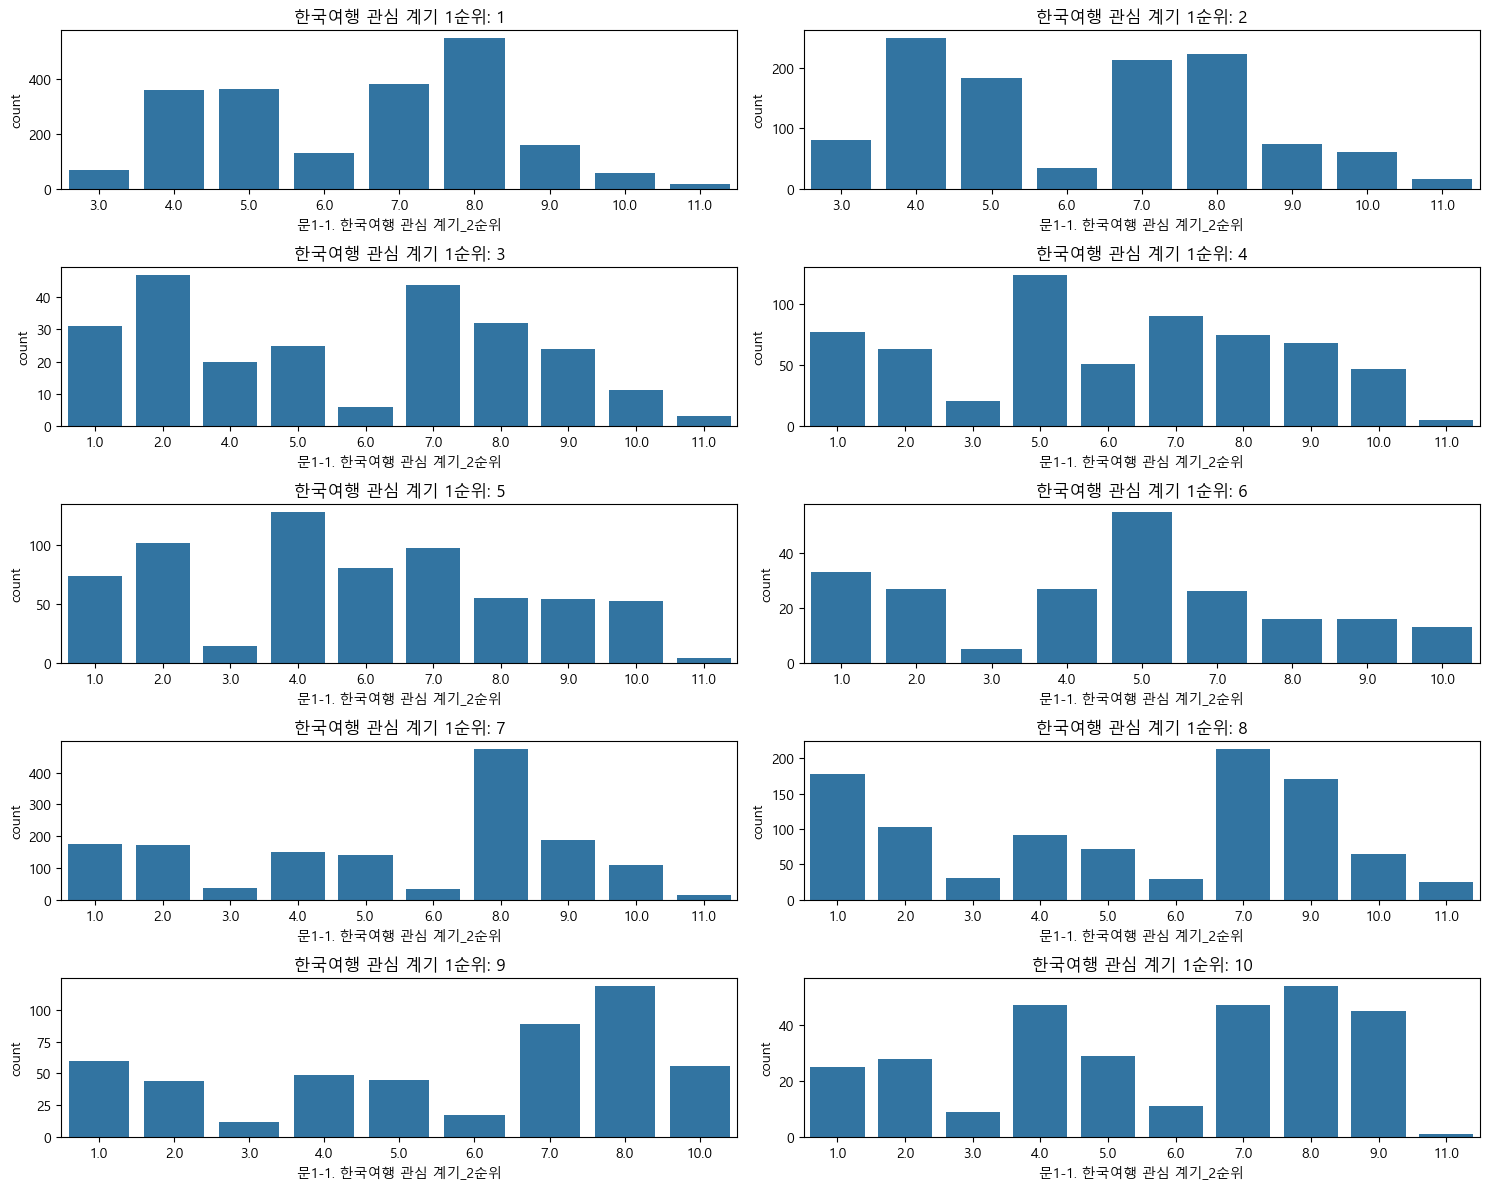

In [140]:
fig, ax = plt.subplots(5, 2, figsize=(15, 12))
for i in range(10):
    sns.countplot(x='문1-1. 한국여행 관심 계기_2순위', data=df2[df2['문1-1. 한국여행 관심 계기_1순위']==float(i+1)], ax=ax[i//2,i%2])
    ax[i//2,i%2].set_title(f'한국여행 관심 계기 1순위: {i+1}')
    
plt.tight_layout()

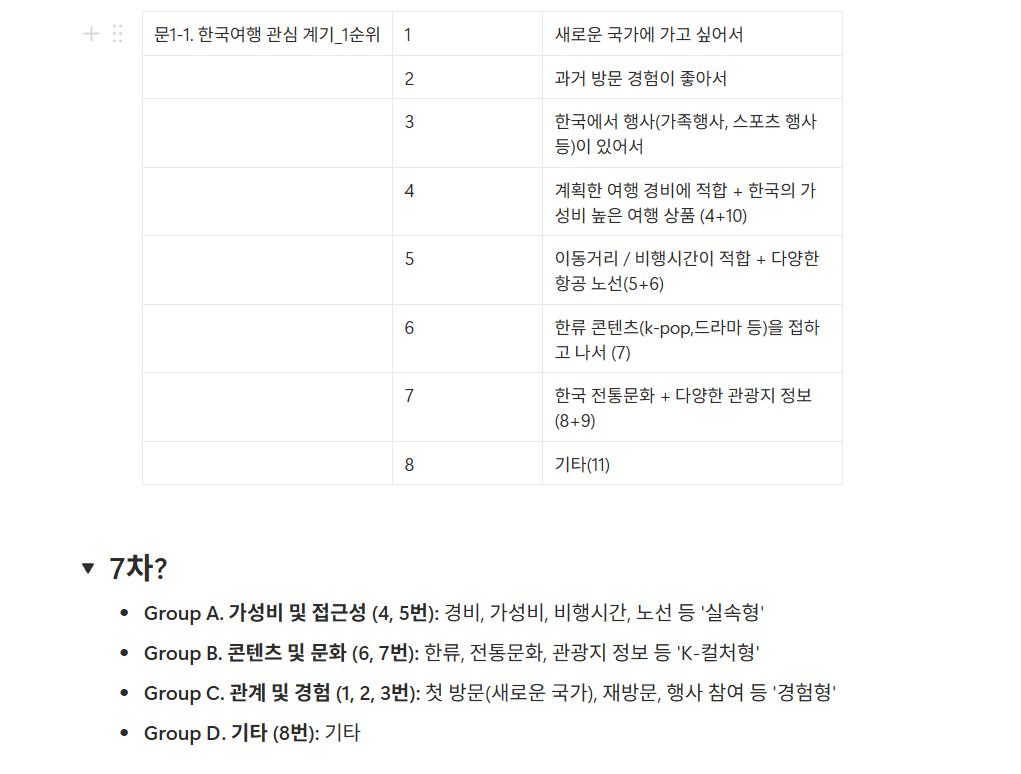

In [141]:
df2['문1-1. 한국여행 관심 계기_1순위'] = df2['문1-1. 한국여행 관심 계기_1순위'].replace({
    1: '경험 및 관계', 2: '경험 및 관계', 3: '경험 및 관계',
    4: '가성비 및 접근성', 5: '가성비 및 접근성', 6: '가성비 및 접근성', 10: '가성비 및 접근성',
    7: 'K-컬처형', 8: 'K-컬처형', 9: 'K-컬처형'
})

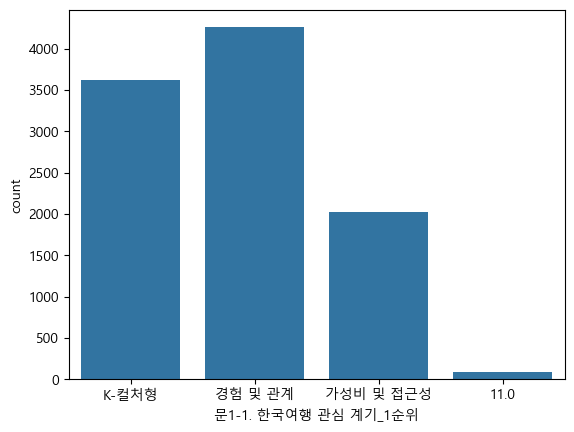

In [143]:
sns.countplot(x = '문1-1. 한국여행 관심 계기_1순위', data=df2)
plt.show()

In [144]:
reason_map = {
    1: '경험 및 관계', 2: '경험 및 관계', 3: '경험 및 관계',
    4: '가성비 및 접근성', 5: '가성비 및 접근성', 6: '가성비 및 접근성', 10: '가성비 및 접근성',
    7: 'K-컬처형', 8: 'K-컬처형', 9: 'K-컬처형'
}

mask = df2['문1-1. 한국여행 관심 계기_1순위'] == 11

df2.loc[mask, '문1-1. 한국여행 관심 계기_1순위'] = df2.loc[mask, '문1-1. 한국여행 관심 계기_2순위'].map(reason_map)

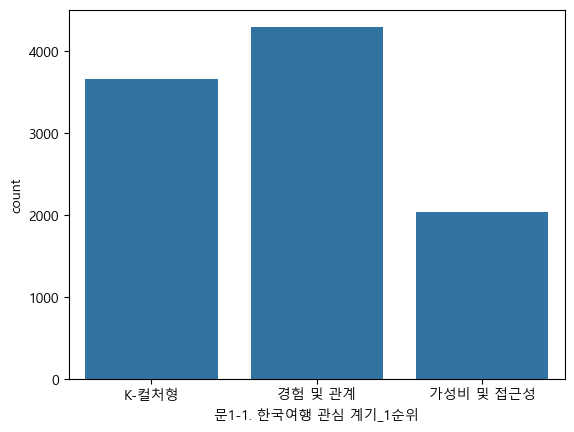

In [145]:
sns.countplot(x = '문1-1. 한국여행 관심 계기_1순위', data=df2)
plt.show()

In [146]:
df2.columns

Index(['아이디', '연령별', '한국 방문횟수(카테고리)', '문3-2. 고려한 관광인프라_1', '여행동반자_그룹',
       '방문 지역 수', '여행 패턴', '문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)',
       '문9-3. 총 체재기간_61일 이상 결측', '문3-1. 고려한 관광활동_1순위', '문1-1. 한국여행 관심 계기_1순위',
       '문1-1. 한국여행 관심 계기_2순위'],
      dtype='object')

In [147]:
df2.drop(columns='문1-1. 한국여행 관심 계기_2순위', inplace=True)
df2.columns

Index(['아이디', '연령별', '한국 방문횟수(카테고리)', '문3-2. 고려한 관광인프라_1', '여행동반자_그룹',
       '방문 지역 수', '여행 패턴', '문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)',
       '문9-3. 총 체재기간_61일 이상 결측', '문3-1. 고려한 관광활동_1순위', '문1-1. 한국여행 관심 계기_1순위'],
      dtype='object')

In [149]:
df2.to_csv('C:/Users/sopi0/codes/korea-tour-recommender/data/2024_8차_전처리.csv', index=False)